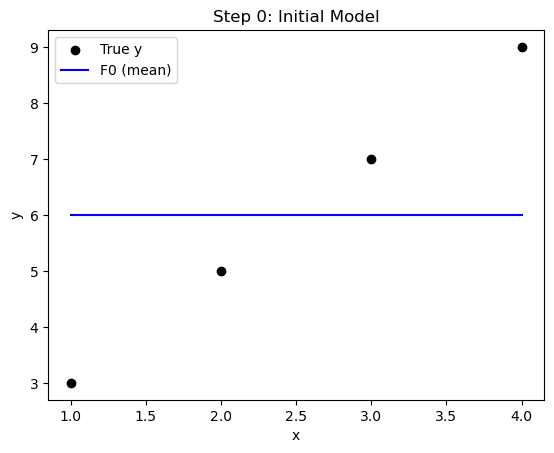

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Toy dataset
x = np.array([1, 2, 3, 4])
y = np.array([3, 5, 7, 9])

# Initial prediction (mean)
F0 = np.mean(y)
F = np.array([F0]*len(y))

plt.scatter(x, y, color='black', label='True y')
plt.plot(x, F, color='blue', label='F0 (mean)')
plt.title("Step 0: Initial Model")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

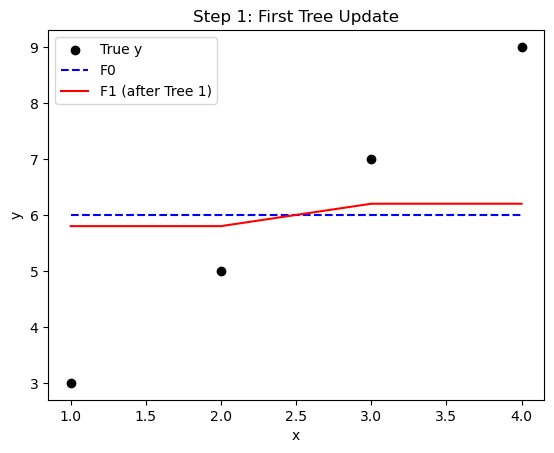

In [2]:
# Residuals (negative gradient for squared error)
residuals = y - F

# First tree: simple split at x=2.5
h1 = np.where(x <= 2.5, -2, 2)

# Learning rate
nu = 0.1

# Update predictions
F1 = F + nu * h1

# Plot
plt.scatter(x, y, color='black', label='True y')
plt.plot(x, F, color='blue', linestyle='--', label='F0')
plt.plot(x, F1, color='red', label='F1 (after Tree 1)')
plt.title("Step 1: First Tree Update")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


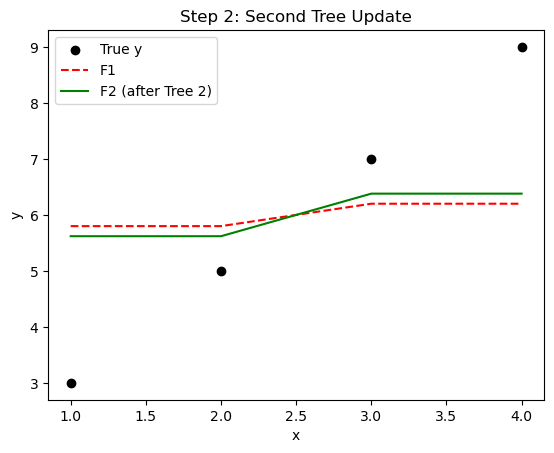

In [3]:
# New residuals
residuals2 = y - F1

# Second tree: same split, new residuals
h2 = np.where(x <= 2.5, np.mean(residuals2[:2]), np.mean(residuals2[2:]))

# Update predictions
F2 = F1 + nu * h2

# Plot
plt.scatter(x, y, color='black', label='True y')
plt.plot(x, F1, color='red', linestyle='--', label='F1')
plt.plot(x, F2, color='green', label='F2 (after Tree 2)')
plt.title("Step 2: Second Tree Update")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


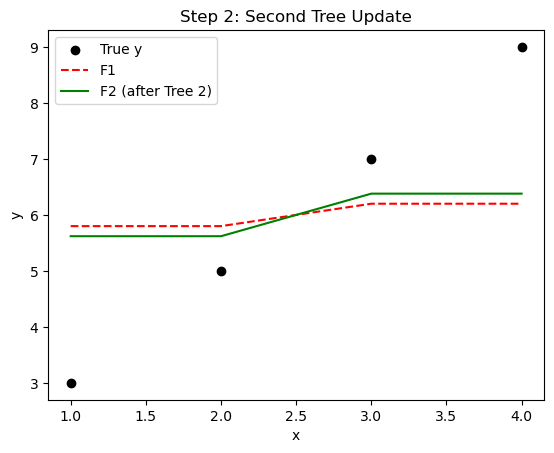

In [5]:
# New residuals
residuals2 = y - F1

# Second tree: same split, new residuals
h2 = np.where(x <= 2.5, np.mean(residuals2[:2]), np.mean(residuals2[2:]))

# Update predictions
F2 = F1 + nu * h2

# Plot
plt.scatter(x, y, color='black', label='True y')
plt.plot(x, F1, color='red', linestyle='--', label='F1')
plt.plot(x, F2, color='green', label='F2 (after Tree 2)')
plt.title("Step 2: Second Tree Update")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


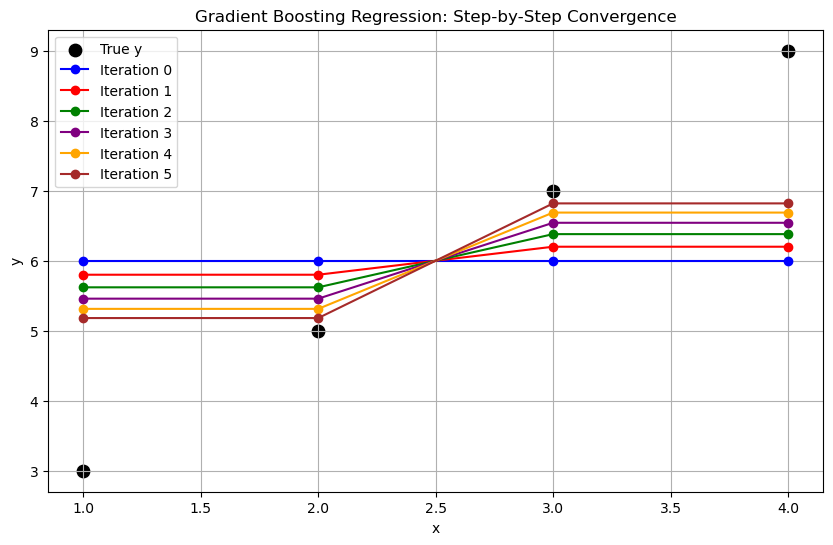

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Toy dataset
x = np.array([1, 2, 3, 4])
y = np.array([3, 5, 7, 9])

# Initialize model
F = np.full_like(y, np.mean(y), dtype=float)
nu = 0.1  # learning rate

# Store predictions for each iteration
predictions = [F.copy()]

# Simulate 5 iterations of GBM
for i in range(5):
    # Compute residuals
    residuals = y - F
    
    # Fit a "decision stump" (split at 2.5)
    h = np.where(x <= 2.5, np.mean(residuals[:2]), np.mean(residuals[2:]))
    
    # Update predictions
    F = F + nu * h
    
    # Save predictions
    predictions.append(F.copy())

# Plotting
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='black', s=80, label='True y')

colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']
for i, pred in enumerate(predictions):
    plt.plot(x, pred, color=colors[i], marker='o', label=f'Iteration {i}')

plt.title("Gradient Boosting Regression: Step-by-Step Convergence")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

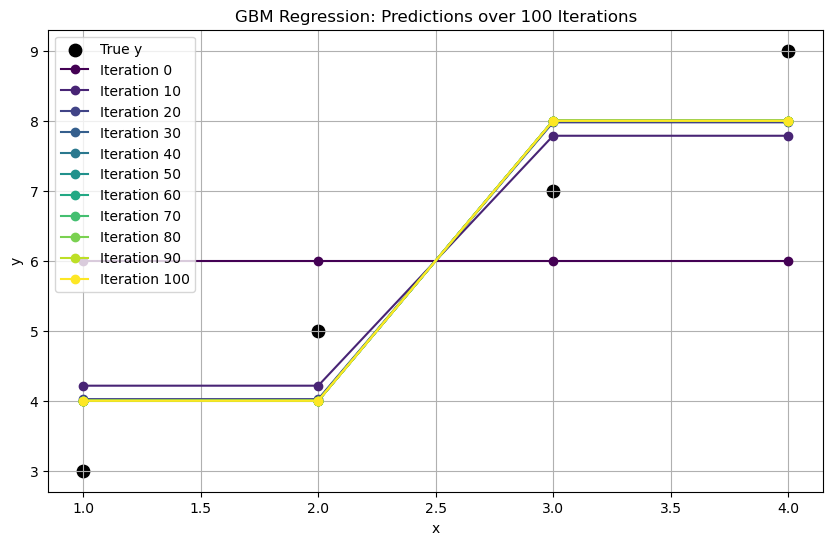

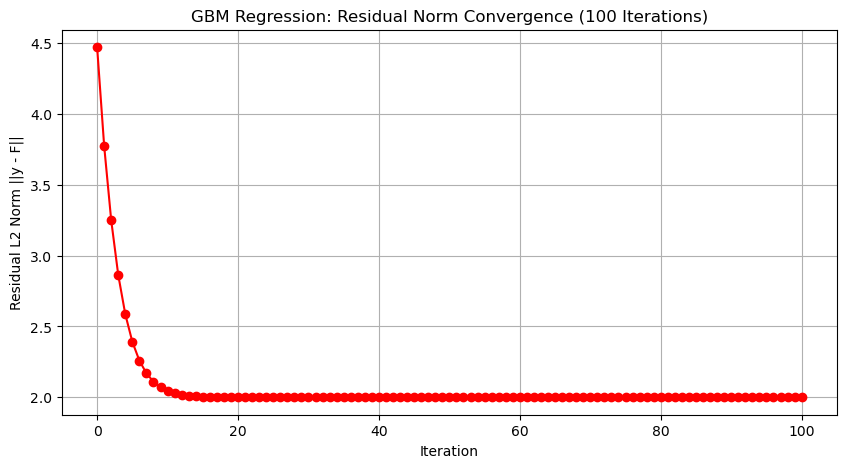

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Toy dataset
x = np.array([1, 2, 3, 4])
y = np.array([3, 5, 7, 9])

# Initialize model
F = np.full_like(y, np.mean(y), dtype=float)
nu = 0.2  # learning rate

# Store predictions and residuals
predictions = [F.copy()]
residual_norms = [np.linalg.norm(y - F)]

# Run GBM for 100 iterations
for i in range(1, 101):
    # Compute residuals
    residuals = y - F
    
    # Fit a "decision stump" (split at x=2.5)
    h = np.where(x <= 2.5, np.mean(residuals[:2]), np.mean(residuals[2:]))
    
    # Update predictions
    F = F + nu * h
    
    # Store predictions every 10 iterations for plotting
    if i % 10 == 0:
        predictions.append(F.copy())
    
    # Store residual norm for convergence plot
    residual_norms.append(np.linalg.norm(y - F))

# -------------------------------
# Plot predictions over iterations
# -------------------------------
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='black', s=80, label='True y')

colors = plt.cm.viridis(np.linspace(0, 1, len(predictions)))
for i, pred in enumerate(predictions):
    plt.plot(x, pred, color=colors[i], marker='o', label=f'Iteration {i*10 if i>0 else 0}')

plt.title("GBM Regression: Predictions over 100 Iterations")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# Plot residual norm convergence
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(range(101), residual_norms, color='red', marker='o')
plt.title("GBM Regression: Residual Norm Convergence (100 Iterations)")
plt.xlabel("Iteration")
plt.ylabel("Residual L2 Norm ||y - F||")
plt.grid(True)
plt.show()
